In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

# 경고창 보이지 않기
import warnings
warnings.filterwarnings('ignore')
# 그래프 설정
plt.rcParams["figure.figsize"] = (13,4)
%matplotlib inline

In [70]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df = pd.concat([df_train.drop('SalePrice', 1), df_test])

df_train['SalePrice'] = df_train['SalePrice'].apply(lambda x : np.log(x))

tonum = {"ExterQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "ExterCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "HeatingQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "KitchenQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "FireplaceQu": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "PoolQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtFinType1" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
         "BsmtFinType2" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
         "BsmtExposure" : {'Gd' : 4, 'Av': 3,'Mn' : 2,'No' : 1, np.nan : 0},
         
        }

df= df.replace(tonum)

fill_na_ls = ['GarageType', 'MiscFeature', 'Fence', 'GarageFinish', 'Alley', 'MasVnrType']

for name in fill_na_ls:
    df[name] = df[name].fillna('N')
    
fill_zero_ls = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'MasVnrArea']

for name in fill_zero_ls:
    df[name] = df[name].fillna(0)
    
fill_mode_ls = ['Electrical', 'Functional', 'MSZoning', 'SaleType', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd']
for name in fill_mode_ls:
    df[name] = df[name].fillna(df[name].mode()[0])

df['TotSF'] = df['1stFlrSF'] + df['TotalBsmtSF'] + df['2ndFlrSF']

df_test = df.iloc[1460:]
df = df.iloc[:1460]
df['SalePrice'] = df_train['SalePrice']

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotSF,SalePrice
0,1,60,RL,6.500000000e+01,8450,Pave,N,Reg,Lvl,AllPub,...,0,N,N,0,2,2008,WD,Normal,2.566000000e+03,1.224769432e+01
1,2,20,RL,8.000000000e+01,9600,Pave,N,Reg,Lvl,AllPub,...,0,N,N,0,5,2007,WD,Normal,2.524000000e+03,1.210901093e+01
2,3,60,RL,6.800000000e+01,11250,Pave,N,IR1,Lvl,AllPub,...,0,N,N,0,9,2008,WD,Normal,2.706000000e+03,1.231716669e+01
3,4,70,RL,6.000000000e+01,9550,Pave,N,IR1,Lvl,AllPub,...,0,N,N,0,2,2006,WD,Abnorml,2.473000000e+03,1.184939770e+01
4,5,60,RL,8.400000000e+01,14260,Pave,N,IR1,Lvl,AllPub,...,0,N,N,0,12,2008,WD,Normal,3.343000000e+03,1.242921620e+01
5,6,50,RL,8.500000000e+01,14115,Pave,N,IR1,Lvl,AllPub,...,0,MnPrv,Shed,700,10,2009,WD,Normal,2.158000000e+03,1.187059991e+01
6,7,20,RL,7.500000000e+01,10084,Pave,N,Reg,Lvl,AllPub,...,0,N,N,0,8,2007,WD,Normal,3.380000000e+03,1.263460303e+01
7,8,60,RL,6.000000000e+01,10382,Pave,N,IR1,Lvl,AllPub,...,0,N,Shed,350,11,2009,WD,Normal,3.197000000e+03,1.220607265e+01
8,9,50,RM,5.100000000e+01,6120,Pave,N,Reg,Lvl,AllPub,...,0,N,N,0,4,2008,WD,Abnorml,2.726000000e+03,1.177452020e+01
9,10,190,RL,5.000000000e+01,7420,Pave,N,Reg,Lvl,AllPub,...,0,N,N,0,1,2008,WD,Normal,2.068000000e+03,1.167843990e+01


# target data

In [ ]:
dfy = df_train['SalePrice']
dfy.describe()

In [ ]:
# 시각화
plt.rcParams["figure.figsize"] = (13,4)

plt.subplot(121)
sns.distplot(dfy)
## QQ plot
plt.subplot(122)
sp.stats.probplot(dfy, plot=plt)
plt.show()

한쪽으로 치우친 모습을 보임 -> log를 취해 정규분포의 모양에 가깝게 변환

In [ ]:
# log 변환
dfy2 = np.log(dfy)

# 시각화
plt.rcParams["figure.figsize"] = (13,4)

plt.subplot(121)
sns.distplot(dfy2)
## QQ plot
plt.subplot(122)
sp.stats.probplot(dfy2, plot=plt)
plt.show()

In [ ]:
df_train['SalePrice'] = df_train['SalePrice'].apply(lambda x : np.log(x))

# feature data 확인

- info 함수
- https://goo.gl/19Qkf1 문서 참고

In [ ]:
#변수 info 확인
df.info()

## NaN 값 처리

### missing data는 train과 test를 함께  본다

- 카테고리 값 중에서 order가 있는 변수는 숫자로 바꿔서 회귀분석 진행
- nan 값은 해당 항목에 대한 '시설'이 없는 것임으로 점수를 0으로 매겨줌.

nan 값 체크

In [18]:
# null 있는 column 체크
def nan_check(df_raw):
    null_check = df_raw.isnull().sum()
    null_count = pd.DataFrame({'column' : null_check.index, 'NaN' : null_check.values})
    # None 값이 있는 column만 가져옴.
    null_count = null_count.query('NaN > 0')
    return(null_count)

# null 없는 column 체크
def nan_check2(df_raw):
    null_check = df_raw.isnull().sum()
    null_count = pd.DataFrame({'column' : null_check.index, 'NaN' : null_check.values})
    # None 값이 없는 column만 가져옴.
    null_count = null_count.query('NaN == 0')
    return(null_count)

In [19]:
nan_check(df)

,NaN,column


In [ ]:
tonum = {"ExterQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "ExterCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "HeatingQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "KitchenQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "FireplaceQu": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "PoolQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtFinType1" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
         "BsmtFinType2" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
         "BsmtExposure" : {'Gd' : 4, 'Av': 3,'Mn' : 2,'No' : 1, np.nan : 0},
         
        }

df= df.replace(tonum)

- nan 값이 '시설 없음'인 변수들에 대해서 'N' 이라는 클래스를 부여해 줌

In [ ]:
fill_na_ls = ['GarageType', 'MiscFeature', 'Fence', 'GarageFinish', 'Alley', 'MasVnrType']

for name in fill_na_ls:
    df[name] = df[name].fillna('N')
    
fill_zero_ls = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'MasVnrArea']

for name in fill_zero_ls:
    df[name] = df[name].fillna(0)
    
fill_mode_ls = ['Electrical', 'Functional', 'MSZoning', 'SaleType', 'LotFrontage', 'Exterior1st', 'Exterior2nd']
for name in fill_mode_ls:
    df[name] = df[name].fillna(df[name].mode()[0])
    


In [ ]:
# 참고

cat_ls = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Bsmt가 없음. -> 0 처리
['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'TotalBsmtSF'
]

# 차고없음 0 처리 
[
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
]

# Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , 
# we can fill in missing values by the median LotFrontage of the neighborhood.
# -> 중앙값 처리 -> 일단 최빈값 처리 해봄.
['LotFrontage']

# 없음 : 0처리
[
'MasVnrArea', 'MasVnrType'
]


#따로 의미 없음. 최빈값처리

'Electrical', 'Functional', 'MSZoning', 'SaleType', 'Utilities', 'LotFrontage', 'Exterior1st', 'Exterior2nd'

In [ ]:
# 참고

a = set(nan_check(df).column) - set(cat_ls)
cat_nan_ls = set(nan_check(df).column) - a
cat_nan_ls

In [ ]:
# 이걸 하는 이유는 아래에 있음.
df['TotSF'] = df['1stFlrSF'] + df['TotalBsmtSF'] + df['2ndFlrSF']

## DataFrame 다시 분리

In [53]:
df_test = df.iloc[1460:]
df = df.iloc[:1460]
df['SalePrice'] = df_train['SalePrice']

In [25]:
# 변수 살펴보기

# 카테고리 변수
cat_ls = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'GarageYrBlt', 'BsmtFullBath', 'BedroomAbvGr', 'MoSold', 'BsmtHalfBath', 'YrSold', 'KitchenAbvGr']
df_cat = df[cat_ls]
df_cat['SalePrice'] = df['SalePrice']

# 실수 변수
num_ls = list(set(df.columns) - set(cat_ls))
num_ls.append('SalePrice')
df_num = df[num_ls]
df_cat['SalePrice'] = df['SalePrice']

## categorical data

In [46]:
def show_viobox(df,col_name):
    print(col_name)
        
    # 각 항목에 대한 빈도 출력 / df2 dataframe 따로 생성
    df2 = pd.DataFrame(df[col_name])
    counts = df2.groupby([col_name]).size().reset_index(name='Counts')
    print(counts)
        
    plt.subplot(121)
    sns.violinplot(x=col_name, y='SalePrice', data=df)
    plt.subplot(122)
    sns.boxplot(x=col_name, y='SalePrice', data=df)
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (13,4)
for col in cat_ls:
    show_viobox(df, col)

### corr 높은 순서대로 numeric data에 대한 scatter plot 그려봄

<  SalePrice  >
1.0


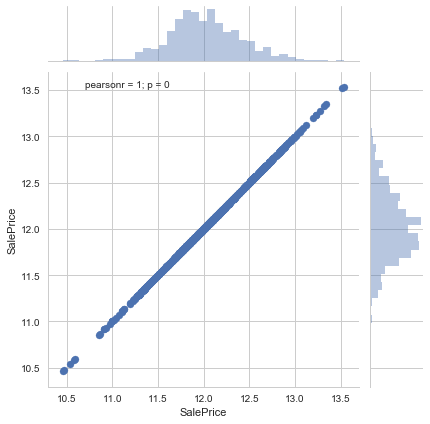

<  SalePrice  >
1.0


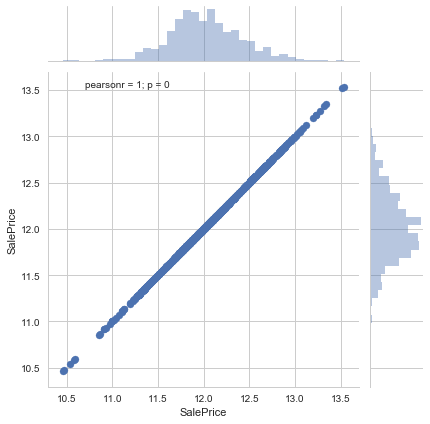

<  TotSF  >
0.777296214853449


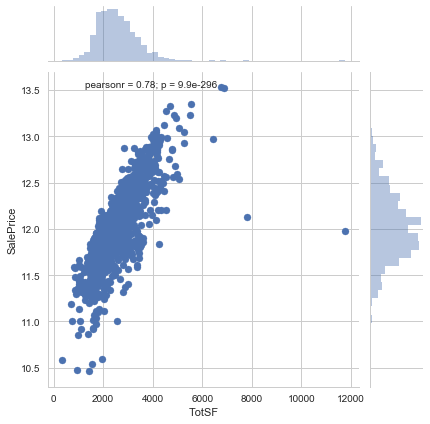

<  GrLivArea  >
0.7009266525441293


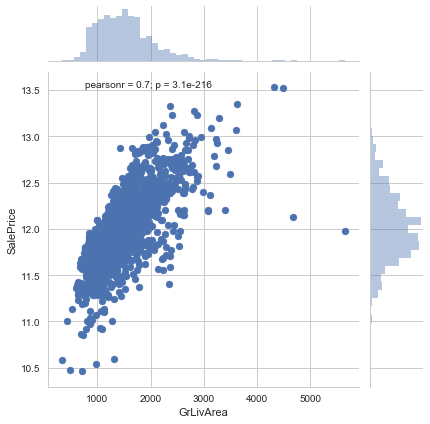

<  GarageArea  >
0.6508875559020062


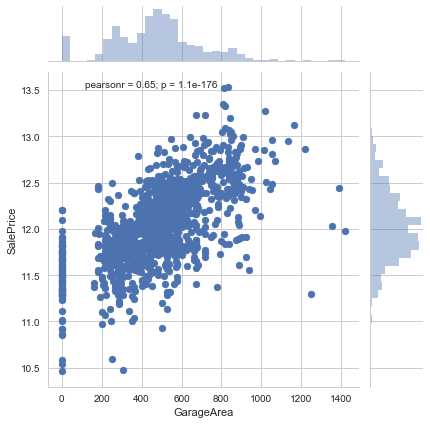

<  TotalBsmtSF  >
0.6121339753697865


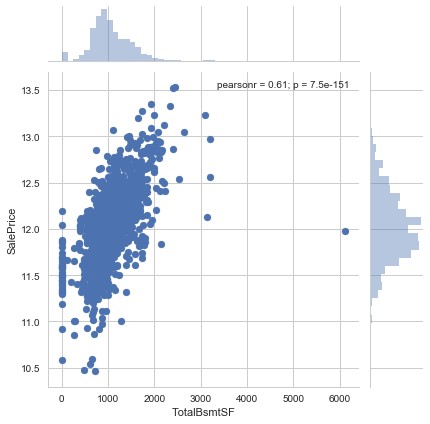

<  1stFlrSF  >
0.596981045034374


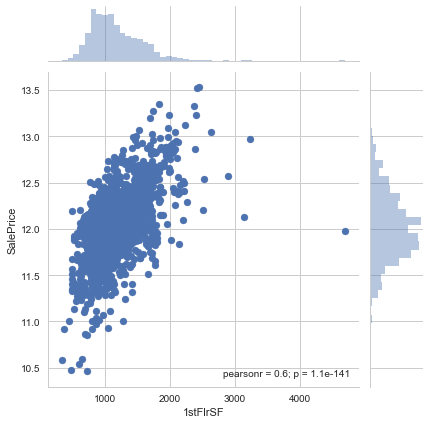

<  MasVnrArea  >
0.42677513183636906


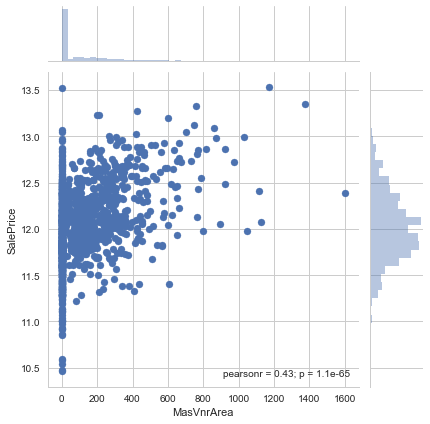

<  BsmtFinSF1  >
0.3720230735670904


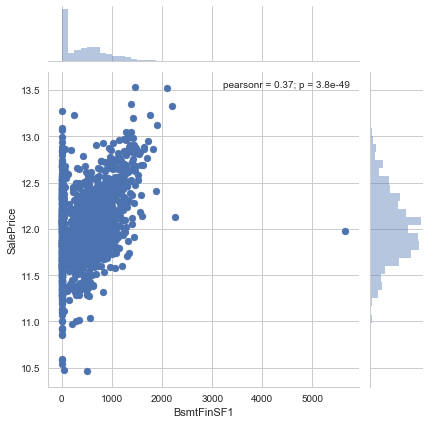

<  WoodDeckSF  >
0.3341350739575136


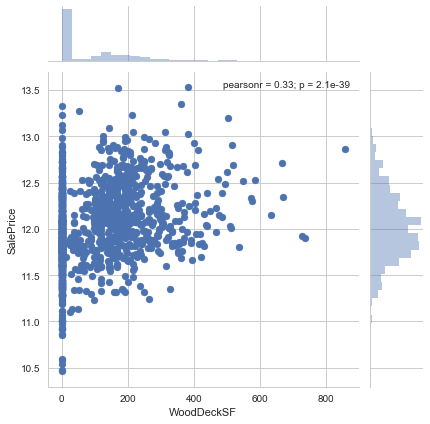

<  LotFrontage  >
0.3235342879004603


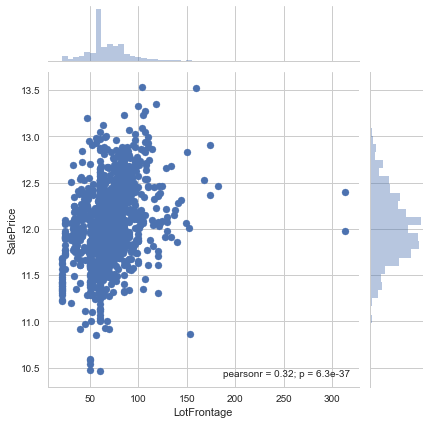

<  OpenPorchSF  >
0.3210529720197666


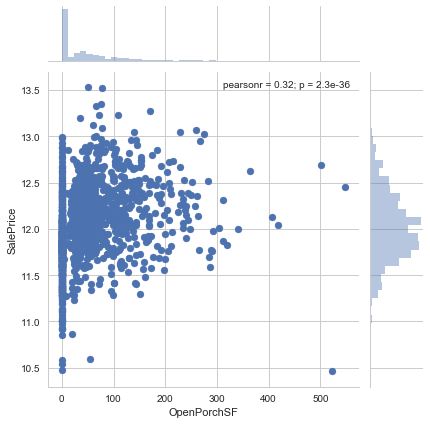

<  2ndFlrSF  >
0.3192999843472038


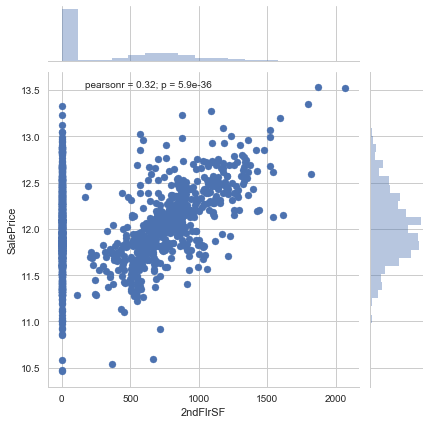

<  HalfBath  >
0.3139822499151441


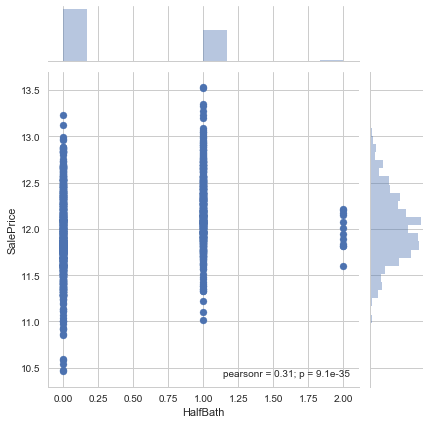

<  LotArea  >
0.25731989235273833


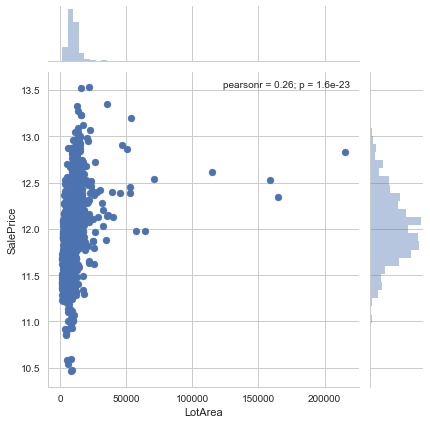

<  BsmtUnfSF  >
0.22198505352520953


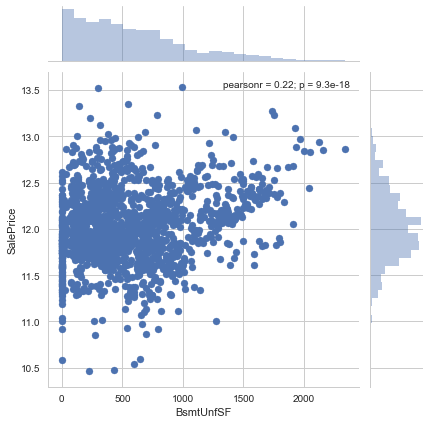

<  ScreenPorch  >
0.12120760489686298


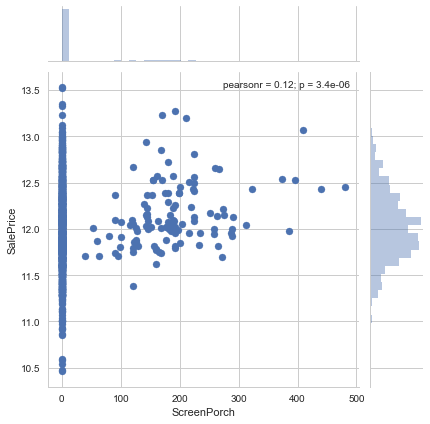

<  PoolArea  >
0.06979780600969131


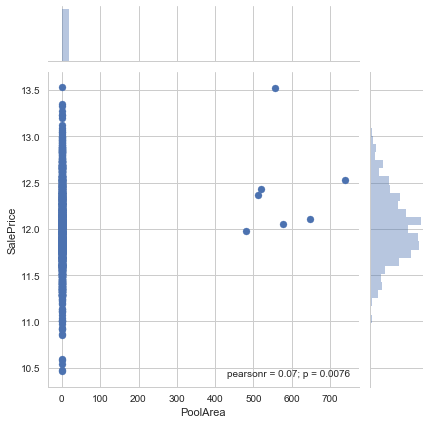

<  3SsnPorch  >
0.05490022646761992


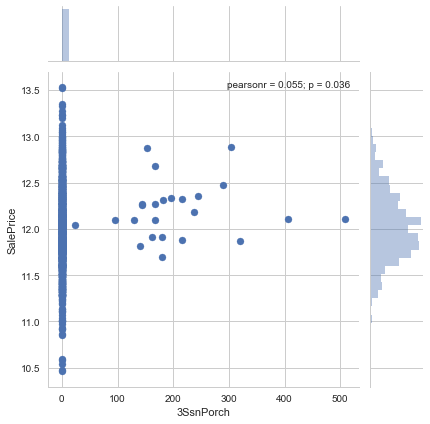

<  BsmtFinSF2  >
0.0048324105320466755


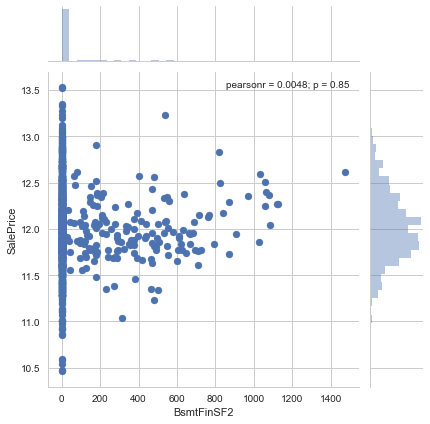

<  Id  >
-0.017942382438871578


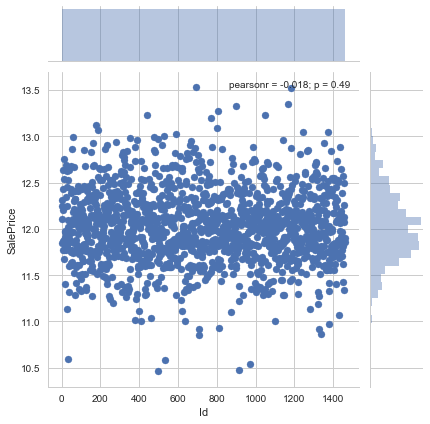

<  MiscVal  >
-0.020020820155023815


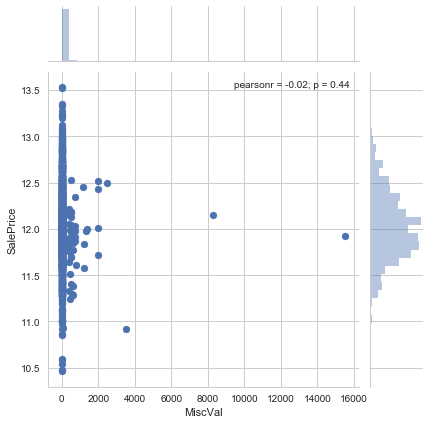

<  LowQualFinSF  >
-0.03796280313742792


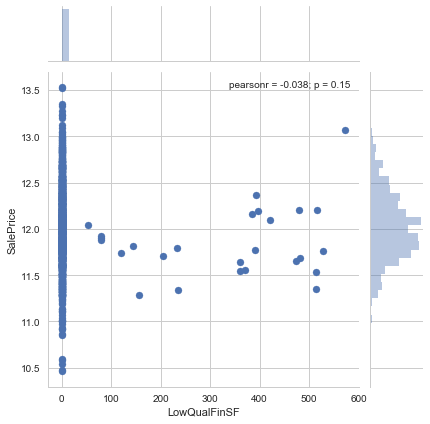

<  EnclosedPorch  >
-0.1490502814276759


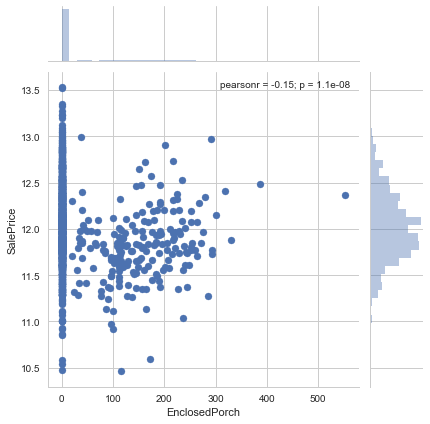

In [57]:
corr = df.corr()['SalePrice']
df_corr = pd.DataFrame({"col" : num_ls})
df_corr['corr'] = df_corr['col'].apply(lambda x : corr[x])
df_corr.sort_values('corr', ascending=False, inplace=True)
num_ls2 = df_corr['col'].values

for col_name in num_ls2:
    print("< ",col_name," >")
    print(corr[col_name])
    sns.jointplot(x=col_name, y="SalePrice", data=df)
    plt.show()


In [ ]:
# 이 아래로는 모두 y에 log 붙인 거

corr = df.corr()['SalePrice']
df_corr = pd.DataFrame({"col" : num_ls})
df_corr['corr'] = df_corr['col'].apply(lambda x : corr[x])
df_corr.sort_values('corr', ascending=False, inplace=True)
num_ls2 = df_corr['col'].values

for col_name in num_ls2:
    print("< ",col_name," >")
    print(corr[col_name])
    sns.jointplot(x=col_name, y="SalePrice", data=df)
    plt.show()


#### TotSF 라는 변수 만들어줌 = 집의 총넓이

### 상관계수 구함
카테고리, 실수 값 상관없이 모두 구함

In [ ]:
df.corr()['SalePrice'].sort_values(ascending=False)

# 하나하나 대조해가면서 변수를 살펴봄.

In [37]:
str_cat_ls = list(set(cat_ls) - set(df.corr()['SalePrice'].index))

In [47]:
for col_name in str_cat_ls:
    print(df.groupby([col_name]).size(), "\n\n")

LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
dtype: int64 


SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
dtype: int64 


BsmtExposure
Av    221
Gd    134
Mn    114
N      38
No    953
dtype: int64 


MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
dtype: int64 


Condition1
Artery      48
Feedr       81
Norm      1260
PosA         8
PosN        19
RRAe        11
RRAn        26
RRNe         2
RRNn         5
dtype: int64 


GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
N           81
dtype: int64 


Fence
GdPrv      59
GdWo       54
MnPrv     157
MnWw       11
N        1179
dtype: int64 


BldgType
1Fam      1220
2fmCon      31
Duplex      52
Twnhs       43
TwnhsE     114
dtype: int64 


Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1335
dtype: int64 


Foundation
BrkTil    146
CBlock

LandContour
  LandContour  Counts
0         Bnk      63
1         HLS      50
2         Low      36
3         Lvl    1311


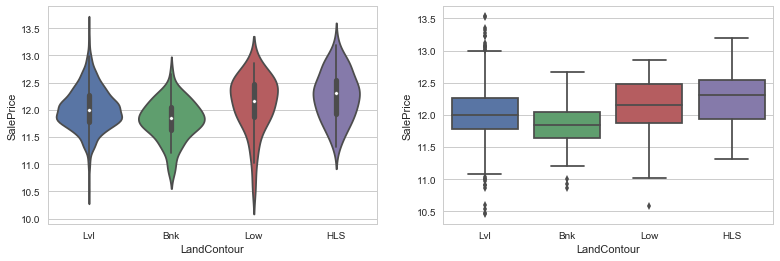

SaleCondition
  SaleCondition  Counts
0       Abnorml     101
1       AdjLand       4
2        Alloca      12
3        Family      20
4        Normal    1198
5       Partial     125


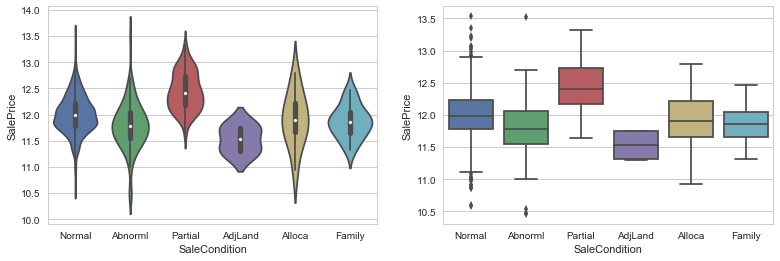

MSZoning
  MSZoning  Counts
0  C (all)      10
1       FV      65
2       RH      16
3       RL    1151
4       RM     218


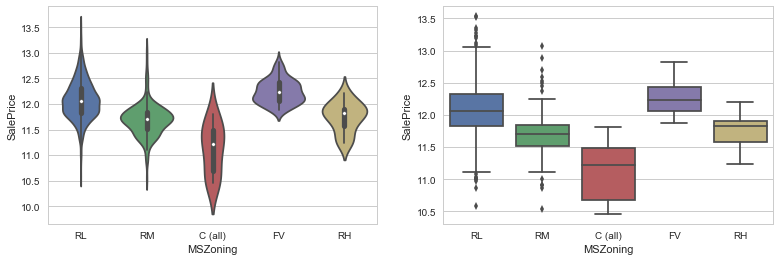

Condition1
  Condition1  Counts
0     Artery      48
1      Feedr      81
2       Norm    1260
3       PosA       8
4       PosN      19
5       RRAe      11
6       RRAn      26
7       RRNe       2
8       RRNn       5


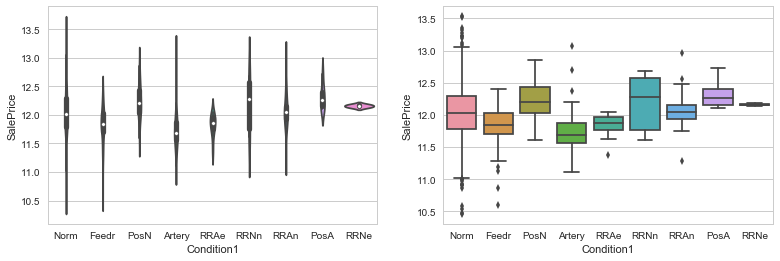

Fence
   Fence  Counts
0  GdPrv      59
1   GdWo      54
2  MnPrv     157
3   MnWw      11
4      N    1179


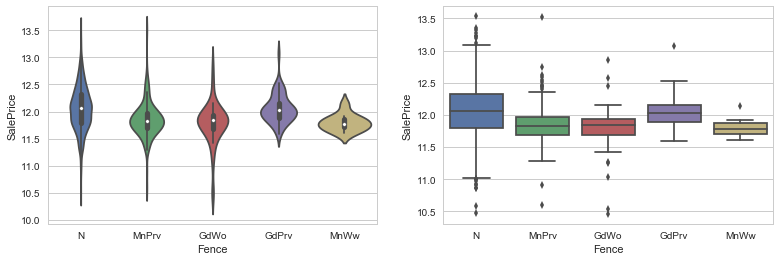

BldgType
  BldgType  Counts
0     1Fam    1220
1   2fmCon      31
2   Duplex      52
3    Twnhs      43
4   TwnhsE     114


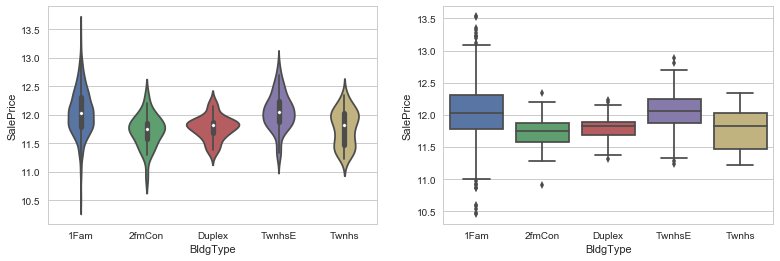

Electrical
  Electrical  Counts
0      FuseA      94
1      FuseF      27
2      FuseP       3
3        Mix       1
4      SBrkr    1335


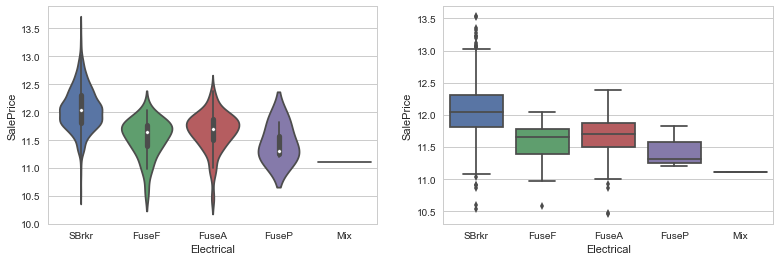

Functional
  Functional  Counts
0       Maj1      14
1       Maj2       5
2       Min1      31
3       Min2      34
4        Mod      15
5        Sev       1
6        Typ    1360


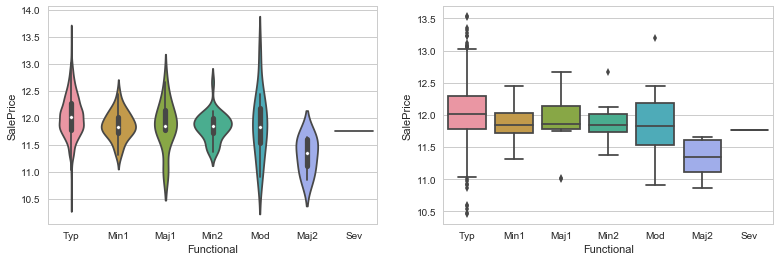

LotConfig
  LotConfig  Counts
0    Corner     263
1   CulDSac      94
2       FR2      47
3       FR3       4
4    Inside    1052


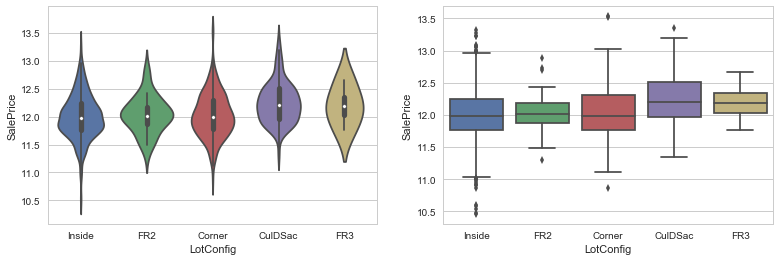

Street
  Street  Counts
0   Grvl       6
1   Pave    1454


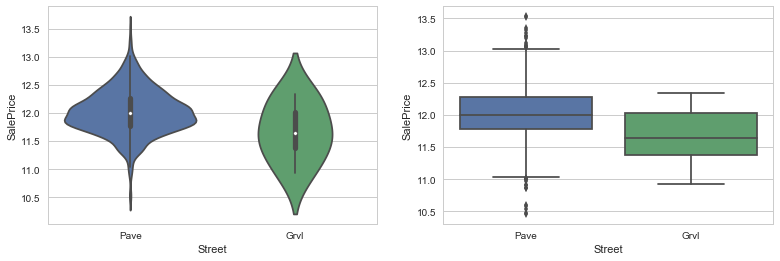

CentralAir
  CentralAir  Counts
0          N      95
1          Y    1365


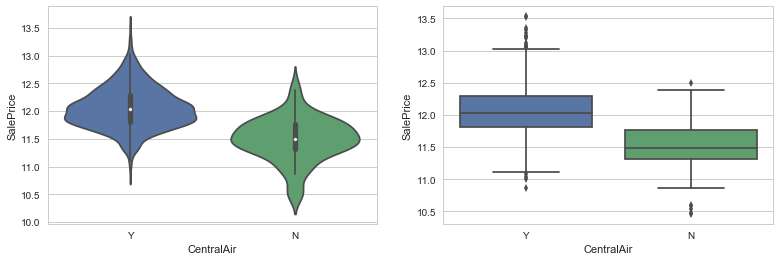

RoofStyle
  RoofStyle  Counts
0      Flat      13
1     Gable    1141
2   Gambrel      11
3       Hip     286
4   Mansard       7
5      Shed       2


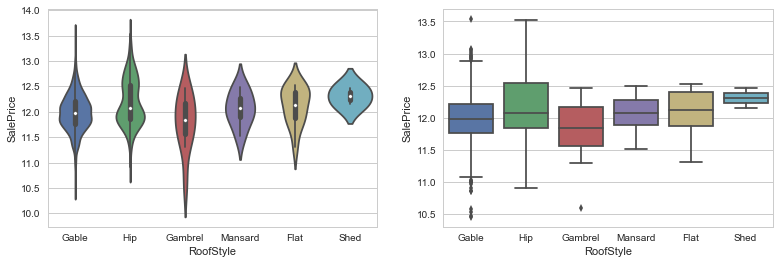

MiscFeature
  MiscFeature  Counts
0        Gar2       2
1           N    1406
2        Othr       2
3        Shed      49
4        TenC       1


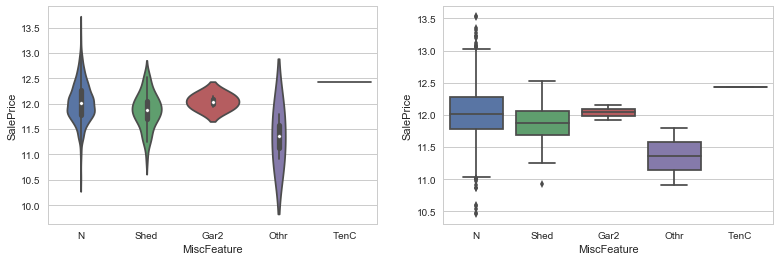

SaleType
  SaleType  Counts
0      COD      43
1      CWD       4
2      Con       2
3    ConLD       9
4    ConLI       5
5    ConLw       5
6      New     122
7      Oth       3
8       WD    1267


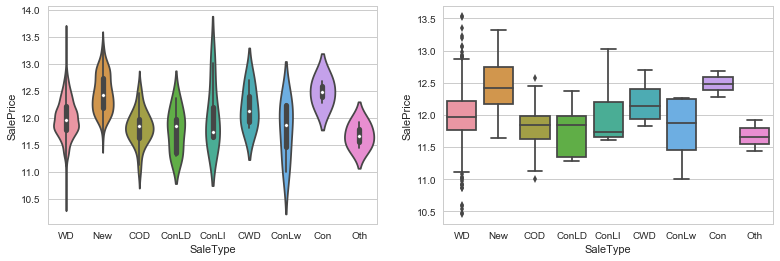

Utilities
  Utilities  Counts
0    AllPub    1459
1    NoSeWa       1


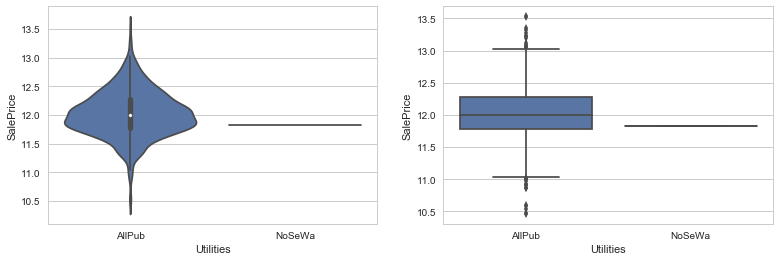

LandSlope
  LandSlope  Counts
0       Gtl    1382
1       Mod      65
2       Sev      13


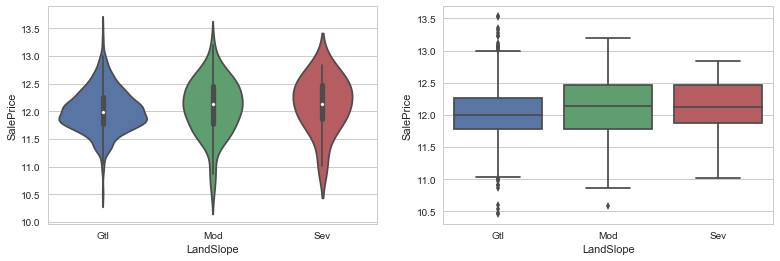

Condition2
  Condition2  Counts
0     Artery       2
1      Feedr       6
2       Norm    1445
3       PosA       1
4       PosN       2
5       RRAe       1
6       RRAn       1
7       RRNn       2


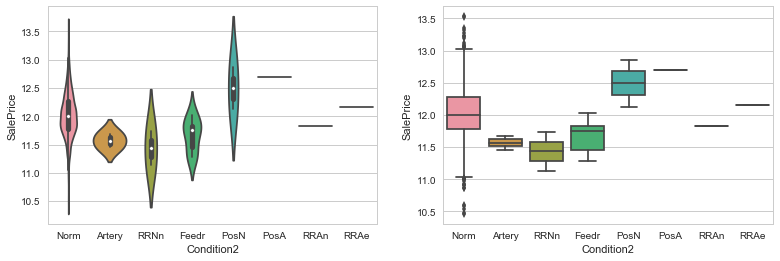

PavedDrive
  PavedDrive  Counts
0          N      90
1          P      30
2          Y    1340


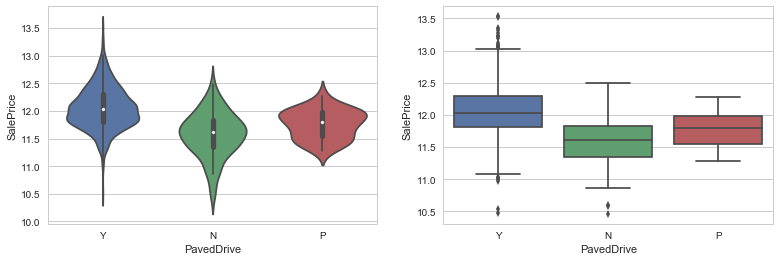

Heating
  Heating  Counts
0   Floor       1
1    GasA    1428
2    GasW      18
3    Grav       7
4    OthW       2
5    Wall       4


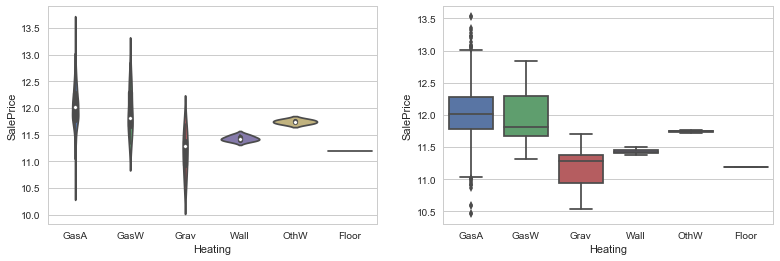

RoofMatl
  RoofMatl  Counts
0  ClyTile       1
1  CompShg    1434
2  Membran       1
3    Metal       1
4     Roll       1
5  Tar&Grv      11
6  WdShake       5
7  WdShngl       6


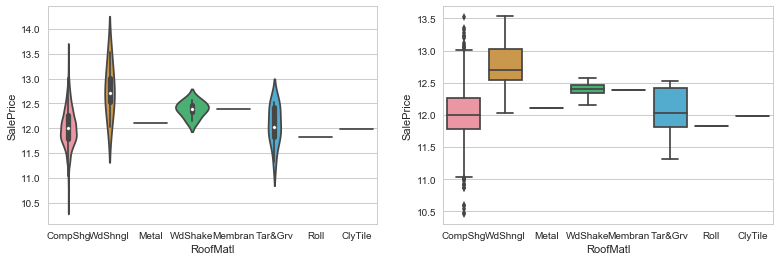

Alley
  Alley  Counts
0  Grvl      50
1     N    1369
2  Pave      41


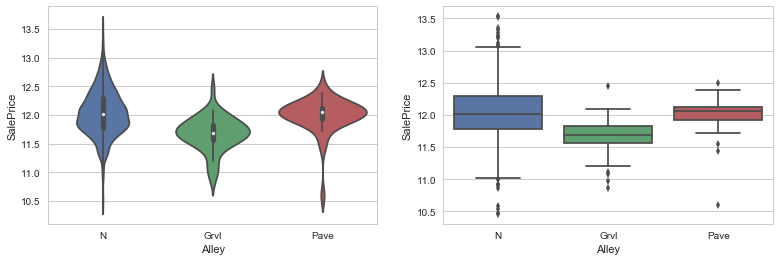

In [50]:
str_thou_ls = []
plt.rcParams["figure.figsize"] = (13,4)

for col_name in str_cat_ls:
    if True in (df.groupby([col_name]).size().values > 1000):
        str_thou_ls.append(col_name)
        show_viobox(df, col_name)

In [ ]:
str_thou_ls

Neighborhood
   Neighborhood  Counts
0       Blmngtn      17
1       Blueste       2
2        BrDale      16
3       BrkSide      58
4       ClearCr      28
5       CollgCr     150
6       Crawfor      51
7       Edwards     100
8       Gilbert      79
9        IDOTRR      37
10      MeadowV      17
11      Mitchel      49
12        NAmes     225
13      NPkVill       9
14       NWAmes      73
15      NoRidge      41
16      NridgHt      77
17      OldTown     113
18        SWISU      25
19       Sawyer      74
20      SawyerW      59
21      Somerst      86
22      StoneBr      25
23       Timber      38
24      Veenker      11


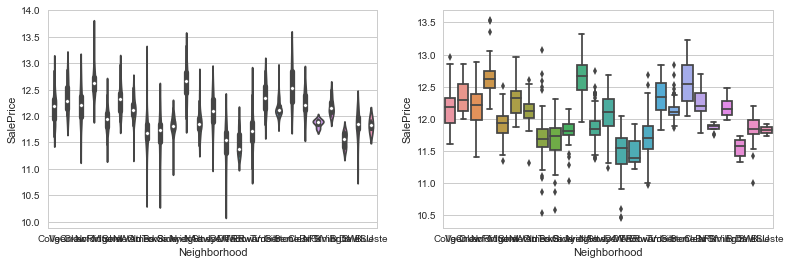

BsmtExposure
  BsmtExposure  Counts
0           Av     221
1           Gd     134
2           Mn     114
3            N      38
4           No     953


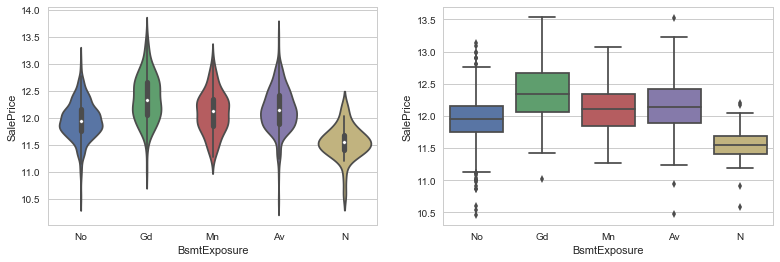

GarageType
  GarageType  Counts
0     2Types       6
1     Attchd     870
2    Basment      19
3    BuiltIn      88
4    CarPort       9
5     Detchd     387
6          N      81


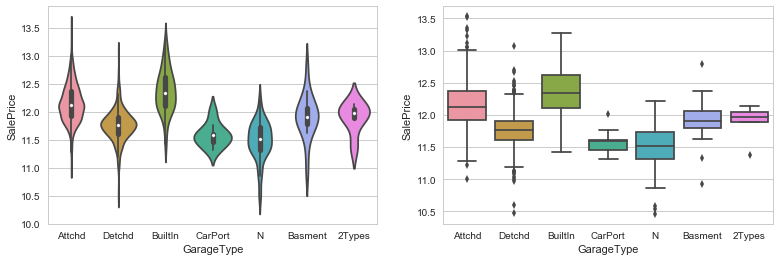

Exterior1st
   Exterior1st  Counts
0      AsbShng      20
1      AsphShn       1
2      BrkComm       2
3      BrkFace      50
4       CBlock       1
5      CemntBd      61
6      HdBoard     222
7      ImStucc       1
8      MetalSd     220
9      Plywood     108
10       Stone       2
11      Stucco      25
12     VinylSd     515
13     Wd Sdng     206
14     WdShing      26


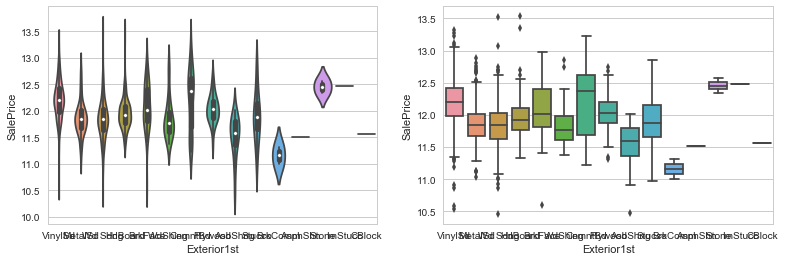

GarageFinish
  GarageFinish  Counts
0          Fin     352
1            N      81
2          RFn     422
3          Unf     605


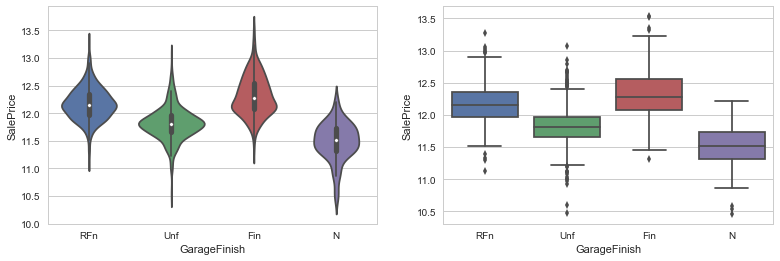

Exterior2nd
   Exterior2nd  Counts
0      AsbShng      20
1      AsphShn       3
2      Brk Cmn       7
3      BrkFace      25
4       CBlock       1
5      CmentBd      60
6      HdBoard     207
7      ImStucc      10
8      MetalSd     214
9        Other       1
10     Plywood     142
11       Stone       5
12      Stucco      26
13     VinylSd     504
14     Wd Sdng     197
15     Wd Shng      38


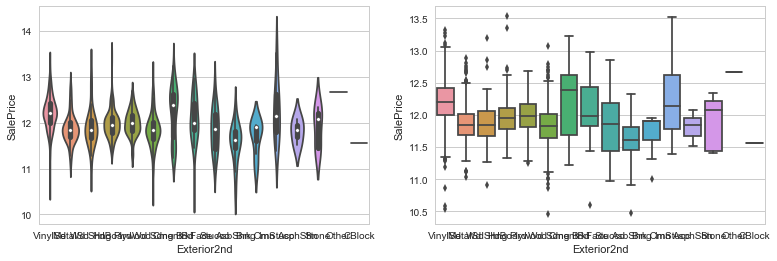

Foundation
  Foundation  Counts
0     BrkTil     146
1     CBlock     634
2      PConc     647
3       Slab      24
4      Stone       6
5       Wood       3


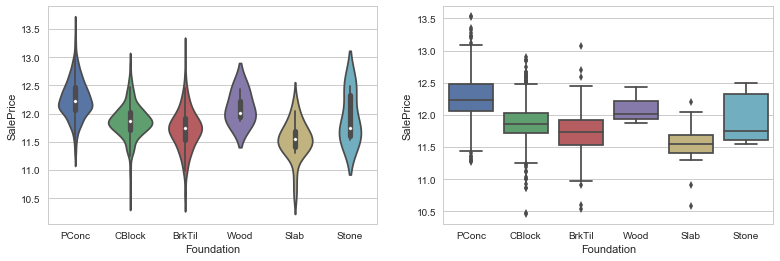

MasVnrType
  MasVnrType  Counts
0     BrkCmn      15
1    BrkFace     445
2          N       8
3       None     864
4      Stone     128


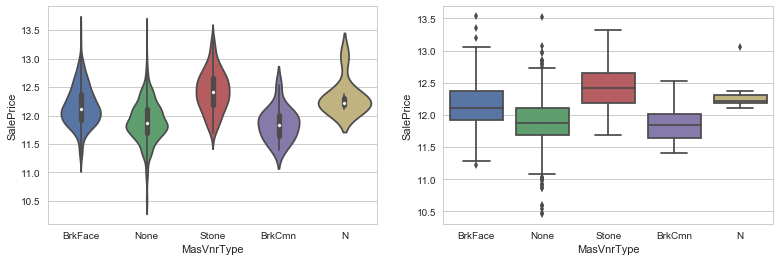

HouseStyle
  HouseStyle  Counts
0     1.5Fin     154
1     1.5Unf      14
2     1Story     726
3     2.5Fin       8
4     2.5Unf      11
5     2Story     445
6     SFoyer      37
7       SLvl      65


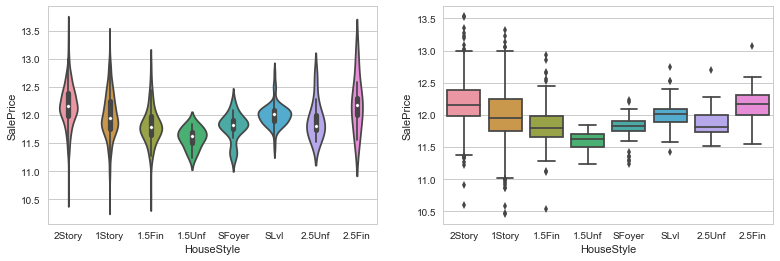

LotShape
  LotShape  Counts
0      IR1     484
1      IR2      41
2      IR3      10
3      Reg     925


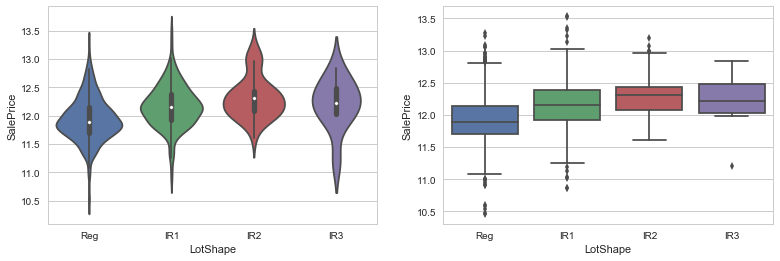

In [51]:
str_cat_ls2 = list(set(str_cat_ls) - set(str_thou_ls))

plt.rcParams["figure.figsize"] = (13,4)
for col in str_cat_ls2:
    show_viobox(df, col)

In [ ]:
str_cat_ls2

# f-test, ANOVA, R-squared

R^2 높은 변수 선택

In [ ]:
a = 'RoofStyle'

sns.stripplot(x=a, y="SalePrice", data=df, jitter=True, alpha=.3)
sns.pointplot(x=a, y="SalePrice", data=df, dodge=True, color='r')
plt.show()
model = sm.OLS.from_formula("SalePrice ~ C({}) + 0".format(a), data=df)
result = model.fit()
f_test = sm.stats.anova_lm(model.fit()).product()

In [ ]:
f_test

In [ ]:
print(result.rsquared_adj)

In [21]:
fpvalue = pd.DataFrame(index=df.columns,columns=['pvalue'])
fpvalue.loc['MSZoning'] =8.817633866272648e-35
fpvalue.loc['Alley'] =4.899826166771113e-08
fpvalue.loc['LotShape'] =6.447523852011766e-25
fpvalue.loc['LandContour'] =2.7422167521379096e-08
fpvalue.loc['LotConfig'] =3.163167473604189e-06
fpvalue.loc['LandSlope'] =0.1413963584114019
fpvalue.loc['Neighborhood'] =1.497728506698194e-224
fpvalue.loc['Condition1'] =8.904549416138853e-08
fpvalue.loc['Condition2'] =0.043425658360948464
fpvalue.loc['BldgType'] =2.0567364604967015e-10
fpvalue.loc['HouseStyle'] =3.376776535121222e-25
fpvalue.loc['RoofStyle'] =3.653523047099125e-17
fpvalue.loc['RoofMatl'] =7.231444779987188e-08
fpvalue.loc['Exterior1st'] =2.5860887286376316e-43
fpvalue.loc['Exterior2nd'] =4.8421856706985465e-43
fpvalue.loc['MasVnrType'] =4.793331178118786e-65
fpvalue.loc['ExterQual'] =1.4395510967787893e-204
fpvalue.loc['ExterCond'] =5.106680608671862e-07
fpvalue.loc['Foundation'] =5.791895002232233e-91
fpvalue.loc['BsmtQual'] =9.610615106781709e-186
fpvalue.loc['BsmtCond'] =5.136900937703027e-09
fpvalue.loc['BsmtExposure'] =1.8077310066862167e-63
fpvalue.loc['BsmtFinType2'] =0.019410089690234594
fpvalue.loc['Heating'] =0.000753472106445497
fpvalue.loc['HeatingQC'] =2.667062092104357e-67
fpvalue.loc['Electrical'] =1.6632487814737638e-18
fpvalue.loc['KitchenQual'] =3.0322127528400614e-192
fpvalue.loc['Functional'] =0.0004841696801078294
fpvalue.loc['FireplaceQu'] =5.016300447019087e-19
fpvalue.loc['GarageType'] =1.247153670658973e-66
fpvalue.loc['GarageFinish'] =1.1991165312294262e-93
fpvalue.loc['GarageQual'] =1.2408026478015653e-07
fpvalue.loc['GarageCond'] =1.3097143055289643e-07
fpvalue.loc['PavedDrive'] =1.803568890651533e-18
fpvalue.loc['PoolQC'] =0.30398528011207915
fpvalue.loc['Fence'] =0.002312645635631918
fpvalue.loc['MiscFeature'] =0.10472761568792907
fpvalue.loc['SaleType'] =5.039766889462451e-42
fpvalue.loc['SaleCondition'] =7.988268404991176e-44
fpvalue.loc['OverallQual'] =0.0
fpvalue.loc['OverallCond'] =7.962288819951294e-38
fpvalue.loc['BsmtFullBath'] =2.88243552729416e-17
fpvalue.loc['BsmtHalfBath'] =0.8013743052059724
fpvalue.loc['FullBath'] =3.802187932448508e-129
fpvalue.loc['BedroomAbvGr'] =3.3043196450461637e-16
fpvalue.loc['HalfBath'] =1.6091449454034875e-31
fpvalue.loc['KitchenAbvGr'] =2.011735142857873e-06
fpvalue.loc['TotRmsAbvGrd'] =1.1917103366526644e-103
fpvalue.loc['Fireplaces'] =4.4210010307257784e-83
fpvalue.loc['GarageCars'] =1.1211287650612485e-211
fpvalue.loc['MoSold'] =0.48335232989243127
fpvalue.loc['YrSold'] =0.6300887663573457



In [120]:
fpvalue

,pvalue
Id,NaN
MSSubClass,NaN
MSZoning,8.81763e-35
LotFrontage,NaN
LotArea,NaN
Street,NaN
Alley,4.89983e-08
LotShape,6.44752e-25
LandContour,2.74222e-08
Utilities,NaN


In [119]:
fpvalue.to_csv('f_p_value.csv')

In [31]:
fpvalue['pvalue'].MoSold

0.48335232989243127

In [43]:
cols = ['RoofStyle', 'CentralAir', 'BldgType', 'LandContour', 'SaleCondition', 'MSZoning', 'Fence', 'LotConfig', 'Foundation', 'HouseStyle', 'Neighborhood', 'MasVnrType', 'BsmtExposure', 'GarageFinish', 'GarageType', 'Exterior2nd', 'LotShape', 'Exterior1st']
anova_test = pd.DataFrame(columns=['col_name', 'f-test', 'f-test2', 'rs', 'rs_a'])
for x1 in str_cat_ls:
    model = sm.OLS.from_formula("SalePrice ~ C({}) + 0".format(x1), data=df)
    
    f_test = sm.stats.anova_lm(model.fit()).product()[4]
    
    result = model.fit()
    rs = result.rsquared
    rs_a = result.rsquared_adj
    f_test2 = fpvalue['pvalue'][x1]
    
    anova_test = anova_test.append({'col_name': x1, 'f-test':f_test, 'f-test2':f_test2, 'rs':rs, 'rs_a':rs_a}, ignore_index=True)
    
# pd.set_option('display.float_format', '{:.100e}'.format)
print(len(anova_test))
pd.set_option('display.float_format', None)
anova_test.sort_values('f-test2', ascending=True)



31


,col_name,f-test,f-test2,rs,rs_a
15,Neighborhood,0.0,1.497729e-224,0.570808,0.563630
17,GarageFinish,0.0,1.199117e-93,0.381034,0.379758
9,Foundation,0.0,5.791895e-91,0.303651,0.301257
5,GarageType,0.0,1.247154e-66,0.334639,0.331892
19,MasVnrType,0.0,4.793331e-65,0.194503,0.192289
2,BsmtExposure,0.0,1.807731e-63,0.142594,0.140237
1,SaleCondition,0.0,7.988268e-44,0.129020,0.126025
16,Exterior1st,0.0,2.586089e-43,0.181531,0.173601
28,Exterior2nd,0.0,4.842186e-43,0.171463,0.162856
22,SaleType,0.0,5.039767e-42,0.120115,0.115264


In [33]:
anova_test = pd.DataFrame(columns=['col_name', 'f-test', 'f-test2', 'rs', 'rs_a'])
for x1 in cat_ls:
    model = sm.OLS.from_formula("SalePrice ~ C({}) + 0".format(x1), data=df)
    
    f_test = sm.stats.anova_lm(model.fit()).product()[4]
    
    result = model.fit()
    rs = result.rsquared
    rs_a = result.rsquared_adj
    f_test2 = fpvalue['pvalue'][x1]
    
    anova_test = anova_test.append({'col_name': x1, 'f-test':f_test, 'f-test2':f_test2, 'rs':rs, 'rs_a':rs_a}, ignore_index=True)
    
anova_test.sort_values('rs', ascending=False).reset_index()

,index,col_name,f-test,f-test2,rs,rs_a
0,14,OverallQual,0.0,0.000000e+00,0.673386,0.671359
1,9,Neighborhood,0.0,1.497729e-224,0.570808,0.563630
2,49,YearBuilt,0.0,NaN,0.498463,0.457165
3,46,GarageCars,0.0,1.121129e-211,0.490108,0.488707
4,21,ExterQual,0.0,1.439551e-204,0.461122,0.460012
5,52,GarageYrBlt,0.0,NaN,0.453196,0.414253
6,24,BsmtQual,0.0,9.610615e-186,0.452301,0.450795
7,33,KitchenQual,0.0,3.032213e-192,0.447640,0.446502
8,37,GarageFinish,0.0,1.199117e-93,0.381034,0.379758
9,50,YearRemodAdd,0.0,NaN,0.362781,0.335452


# OLS

In [81]:
df_all = df.copy()

# model_all = sm.OLS.from_formula("SalePrice ~ scale(BsmtQual) + scale(HeatingQC) + scale(KitchenQual) + scale(FireplaceQu) + C(MSZoning) +scale(OverallQual) + scale(MSSubClass) + scale(GarageCars) + scale(GrLivArea) + scale(OverallCond) + scale(TotRmsAbvGrd) + scale(YearBuilt) + scale(LotArea) +  scale(ScreenPorch) + scale(BsmtFullBath) + scale(WoodDeckSF) ", data=df_all)

# model_all = sm.OLS.from_formula("SalePrice ~ C(Neighborhood) + C(GarageFinish) + C(Foundation) + C(GarageType) + C(MasVnrType) + C(BsmtExposure) + C(SaleCondition) + C(Exterior1st) + C(Exterior2nd) + C(SaleType) + C(MSZoning)", data=df_all)

model_all = sm.OLS.from_formula("SalePrice ~ C(Neighborhood) + C(Foundation) + C(SaleCondition) + C(MSZoning) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(GarageArea) + scale(BsmtQual) + scale(YearRemodAdd) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(HeatingQC)", data=df_all)


result_all = model_all.fit()
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     203.9
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:03:06   Log-Likelihood:                 794.35
No. Observations:                1460   AIC:                            -1489.
Df Residuals:                    1410   BIC:                            -1224.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [ ]:
len(df_test)

In [ ]:
df_test['TotSF'] = df_test['1stFlrSF'] + df_test['TotalBsmtSF'] + df_test['2ndFlrSF']

In [ ]:
pre = pd.DataFrame(result_all.predict(df_test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))
pre.to_csv('submission.csv', index=False)

In [ ]:
pre.describe()

## 아웃라이어 제거

In [82]:
influence = result_all.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (1460 - 1 - 50)
idx = np.where(cooks_d2 > fox_cr)[0]
idx = list(set(idx) - set([599, 956]))
df_all2 = df_all.copy()
df_all2 = df_all2.drop(df_all2.index[idx])

In [93]:
model_all2 = sm.OLS.from_formula("SalePrice ~ C(Neighborhood) + C(Foundation) + C(SaleCondition) + C(MSZoning) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(GarageArea) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", data=df_all2)


# model_all2 = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", data = df_all2)

result_all2 = model_all2.fit()
print(result_all2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     314.5
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:14:44   Log-Likelihood:                 1134.0
No. Observations:                1376   AIC:                            -2172.
Df Residuals:                    1328   BIC:                            -1921.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [94]:
pre = pd.DataFrame(result_all2.predict(df_test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))
pre.to_csv('submission.csv', index=False)

In [92]:
pre

,SalePrice,Id
0,121461.088040,1461
1,150189.395884,1462
2,169929.200261,1463
3,184212.556026,1464
4,219435.104580,1465
5,173296.691481,1466
6,168826.820771,1467
7,167751.745638,1468
8,201087.877270,1469
9,118214.468670,1470


# VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

ls = ['OverallQual', 'TotSF', 'GrLivArea', 'GarageCars', 'KitchenQual', 'BsmtQual', 'YearRemodAdd', 'Fireplaces', 'HeatingQC']
df_vif = df[ls]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["features"] = df_vif.columns
vif

### GrLivArea 랑 TotSF 가 높긴함.

In [17]:
df_vif.corr()

NameError: name 'df_vif' is not defined

# 교차검증

In [14]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# cv = KFold(30, shuffle=True)
y, X = dmatrices("SalePrice ~ C(Neighborhood) + C(GarageFinish) + C(Foundation) + scale(I(OverallQual**3)) + scale(I(OverallQual**2)) + scale(I(OverallQual)) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", df_all, return_type = 'dataframe' )


#poly = PolynomialFeatures(1)
model1_LR = LinearRegression().fit(X, y)
model1_ridge = Ridge().fit(X, y)
model1_lasso = Lasso().fit(X, y)
model1_EN = ElasticNet().fit(X, y)
                
cv = KFold(30, shuffle=False)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model1_LR, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)),'\n'
      'std : ', np.std(cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)))

print('[Ridge]')
print('score : ', cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)),'\n'
      'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model1_EN, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

[Original LR]
score :  [0.8472146  0.90533359 0.86961836 0.88000378 0.91672588 0.88131289
 0.88591741 0.89438161 0.86210378 0.84828585 0.75267126 0.86612758
 0.83653078 0.863426   0.89546854 0.88945184 0.86925334 0.79227383
 0.86231562 0.81350261 0.91919096 0.89952246 0.86897281 0.90161558
 0.92144749 0.90057398 0.05654989 0.87150563 0.88704002 0.84586073] 
 mean :  0.8434732903244163 
std :  0.15057281451305604
[Ridge]
score :  [0.84661698 0.90418686 0.86825873 0.87898247 0.91608056 0.87878715
 0.88809478 0.90345803 0.8622321  0.84597654 0.75381933 0.86816335
 0.8365721  0.86453424 0.89412054 0.88960273 0.86827955 0.79484893
 0.8543166  0.80863799 0.91902108 0.89983023 0.86346716 0.89728674
 0.92068353 0.89615714 0.06943105 0.87208259 0.88915672 0.84713858] 
 mean :  0.8433274792880635 
std :  0.14822908515488661

[Lasso]
score :  [-5.48446054e-05 -2.34984419e-02 -6.96465604e-03 -7.78851330e-02
 -1.81569570e-04 -1.82358729e-02 -7.88389231e-02 -1.59698995e-03
 -4.30144206e-02 -9.962302

In [16]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

y, X = dmatrices( "SalePrice ~  scale(KitchenQual)+ scale(I(KitchenQual**2))+ scale(I(KitchenQual**3)) + scale(I(GarageCars**2)) + C(Neighborhood)+ scale(OverallQual) + scale(I(OverallQual)**2) + scale(I(OverallQual)**3)+ scale(GrLivArea) + scale(TotalBsmtSF) + scale(I(TotalBsmtSF**2)) + scale(I(TotalBsmtSF**3))", df_all , return_type = 'dataframe' )

#poly = PolynomialFeatures(1)
model1_LR = LinearRegression().fit(X, y)
model1_ridge = Ridge().fit(X, y)
model1_lasso = Lasso().fit(X, y)
model1_EN = ElasticNet().fit(X, y)
                
cv = KFold(10, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model1_LR, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)),'\n')

print('[Ridge]')
print('score : ', cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="r2", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)),'\n')
      #'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="r2", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model1_EN, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)),'\n')
#      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="r2", cv=cv)))

[Original LR]
score :  [0.83704658 0.87827938 0.69852524 0.86457859 0.84005125 0.9064439
 0.82264444 0.87304799 0.8733956  0.86918219] 
 mean :  0.6621063652474937 

[Ridge]
score :  [0.84241269 0.88066455 0.80995483 0.86190126 0.87448785 0.83032039
 0.77668263 0.90488445 0.61107135 0.87911731] 
 mean :  0.8421492402491753 


[Lasso]
score :  [-1.00389886e-02 -2.35336223e-02 -1.60075635e-03 -1.71993545e-03
 -8.04179984e-05 -2.49706853e-04 -3.85141674e-04 -1.99296036e-03
 -1.24023593e-03 -8.48440829e-03] 
 mean :  -0.005415291713063586 


[Elastic-net]
score :  [-4.01482052e-05 -8.78981260e-04 -8.47358358e-03 -6.36434640e-03
 -1.06922270e-03 -4.67272901e-03 -1.39164898e-03 -4.33054525e-04
 -2.23053965e-02 -3.02479401e-05] 
 mean :  -0.006097899970875597 



In [10]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

cv = KFold(20, shuffle=True)
y, X = dmatrices("SalePrice ~ C(Neighborhood) + C(GarageFinish) + C(Foundation) + scale(I(OverallQual**3)) + scale(I(OverallQual**2)) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", df_all, return_type = 'dataframe' )
y2, X2 = dmatrices("SalePrice ~ C(Neighborhood) + C(GarageFinish) + C(Foundation) + scale(I(OverallQual**2)) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", df_all, return_type = 'dataframe' )
y3, X3 = dmatrices("SalePrice ~ C(GarageFinish) + C(Foundation) + scale(I(OverallQual**3)) + scale(I(OverallQual**2)) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", df_all, return_type = 'dataframe' )
y4, X4 = dmatrices("SalePrice ~ C(Neighborhood) + C(GarageFinish) + C(Foundation) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", df_all, return_type = 'dataframe' )


#poly = PolynomialFeatures(1)
model1_LR = LinearRegression().fit(X, y)
model1_LR2 = LinearRegression().fit(X2, y2)
model1_LR3 = LinearRegression().fit(X3, y3)
model1_LR4 = LinearRegression().fit(X4, y4)

                
cv = KFold(20, shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)
print('[Original LR]')
print('score : ', cross_val_score(model1_LR, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)),'\n'
      'std : ', np.std(cross_val_score(model1_LR, X, y, scoring="r2", cv=cv)),'\n')

print('[Original LR2]')
print('score : ', cross_val_score(model1_LR2, X, y, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_LR2, X2, y2, scoring="r2", cv=cv)),'\n'
      'std : ', np.std(cross_val_score(model1_LR2, X2, y2, scoring="r2", cv=cv)),'\n')

print('[Original LR3]')
print('score : ', cross_val_score(model1_LR3, X3, y3, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_LR3, X3, y3, scoring="r2", cv=cv)),'\n'
      'std : ', np.std(cross_val_score(model1_LR3, X3, y3, scoring="r2", cv=cv)),'\n')

print('[Original LR4]')
print('score : ', cross_val_score(model1_LR4, X4, y4, scoring="r2", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_LR4, X4, y4, scoring="r2", cv=cv)),'\n'
      'std : ', np.std(cross_val_score(model1_LR4, X4, y4, scoring="r2", cv=cv)),'\n')

[Original LR]
score :  [0.43195753 0.85801933 0.84228784 0.85199784 0.8790932  0.79639292
 0.87547092 0.81172016 0.89667024 0.8671755  0.88790337 0.90584947
 0.89694406 0.88929369 0.87330173 0.87601125 0.85988892 0.87599691
 0.85036836 0.92349642] 
 mean :  0.8439468703776788 
std :  0.10505555267669406 

[Original LR2]
score :  [0.93750125 0.86280958 0.84606106 0.8150942  0.87692133 0.84683198
 0.8693337  0.87433414 0.8595687  0.89669658 0.89188497 0.9076033
 0.87727514 0.35653639 0.90068504 0.86713706 0.90078137 0.87678953
 0.88247087 0.717191  ] 
 mean :  0.8528910584216517 
std :  0.09582692116508576 

[Original LR3]
score :  [0.85117426 0.83438412 0.78508234 0.8164984  0.8720283  0.85069075
 0.88406938 0.86633029 0.61038775 0.86051522 0.90602548 0.12591052
 0.89437185 0.88227237 0.85103387 0.82517513 0.85514493 0.87802197
 0.87809638 0.89920811] 
 mean :  0.8284156964991313 
std :  0.12622071194859746 

[Original LR4]
score :  [0.86279455 0.92671576 0.88123733 0.73469614 0.9212183

# ridge 모형 돌려봄

In [ ]:
result_ridge = model_all2.fit_regularized(alpha=0.01, L1_wt=0)
print(result_ridge.params.round(2))
print(result_all2.params.values.round(1))

In [ ]:
pre = pd.DataFrame(result_ridge.predict(df_test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))
pre.to_csv('submission.csv', index=False)

In [56]:
df_all = df.copy()
# model_all = sm.OLS.from_formula("SalePrice ~ OverallQual + TotSF + GrLivArea + GarageCars + ExterQual + KitchenQual + GarageArea + BsmtQual + YearBuilt + YearRemodAdd + FireplaceQu + TotRmsAbvGrd + Fireplaces + HeatingQC + MasVnrArea", data = df)
# ExterQual, FireplaceQu, MasVnrArea 제외

# model_all = sm.OLS.from_formula("SalePrice ~ OverallQual + TotSF + GrLivArea + GarageCars + KitchenQual + GarageArea + BsmtQual + YearBuilt + YearRemodAdd + TotRmsAbvGrd + Fireplaces + HeatingQC ", data = df)

# 스케일링
# model_all = sm.OLS.from_formula("SalePrice ~ scale(I(OverallQual**2)) + scale(I(OverallQual)) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(GarageArea) + scale(BsmtQual) + scale(YearBuilt) + scale(YearRemodAdd) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(HeatingQC)", data = df_all)

#문자 포함
# model_all = sm.OLS.from_formula("SalePrice ~ C(CentralAir) + C(BldgType) + C(LandContour) + C(SaleCondition) + C(MSZoning) + C(Foundation) + C(Neighborhood) + C(LotShape) + scale(I(OverallQual**2)) + scale(I(OverallQual)) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(GarageArea) + scale(BsmtQual) + scale(YearBuilt) + scale(YearRemodAdd) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(HeatingQC)", data = df_all)

# model_all = sm.OLS.from_formula("SalePrice ~ C(CentralAir) + C(BldgType) + C(LandContour) + C(SaleCondition) + C(MSZoning) + C(Foundation) + C(Neighborhood) + C(LotShape) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(BsmtQual) + scale(YearBuilt) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", data = df_all)

# YearBtYear제거
# model_all = sm.OLS.from_formula("SalePrice ~ C(CentralAir) + C(BldgType) + C(LandContour) + C(SaleCondition) + C(MSZoning) + C(Foundation) + C(Neighborhood) + C(LotShape) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", data = df_all)

# r-squared 값을 기준으로 카테고리 고름
model_all = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", data = df_all)


result_all = model_all.fit()
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     786.9
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:27:57   Log-Likelihood:                 562.40
No. Observations:                1460   AIC:                            -1105.
Df Residuals:                    1450   BIC:                            -1052.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.0241    

# 모든 변수

In [99]:
df_all = df.copy()

# r-squared 값을 기준으로 카테고리 고름
# model_all = sm.OLS.from_formula("SalePrice ~ C(Neighborhood) + C(GarageFinish) + C(Foundation) + C(GarageType) + C(MasVnrType) + C(BsmtExposure) + C(SaleCondition) + C(Exterior1st) + C(Exterior2nd) + C(SaleType) + C(MSZoning) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(ExterQual) + scale(KitchenQual) + scale(GarageArea) + scale(BsmtQual) + scale(YearBuilt) + scale(YearRemodAdd) + scale(FireplaceQu) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(HeatingQC) + scale(MasVnrArea) ", data = df_all)

model_all = sm.OLS.from_formula("SalePrice ~ C(Neighborhood) + C(Foundation) + C(GarageType) + C(BsmtExposure) + C(SaleCondition) + C(Exterior1st) + C(MSZoning) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(GarageArea) + scale(BsmtQual) + scale(YearRemodAdd) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(HeatingQC)", data = df_all)

# model_all = sm.OLS.from_formula("SalePrice ~ scale(HeatingQC) + scale(BsmtQual) + scale(KitchenQual)+ C(Neighborhood)+ C(MSZoning) + scale(OverallQual) + scale(GarageCars) + scale(GrLivArea) + scale(OverallCond) + scale(YearBuilt)  + scale(BsmtFullBath)", data = df_all)

# model_all = sm.OLS.from_formula("SalePrice ~ scale(HeatingQC) + scale(BsmtQual) + scale(KitchenQual)+ C(Neighborhood)+ C(MSZoning) + scale(OverallQual) + scale(GarageCars) + scale(GrLivArea) + scale(OverallCond) + scale(YearBuilt)  + scale(BsmtFullBath)", data = df_all)


result_all = model_all.fit()
print(result_all.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     147.7
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:51:16   Log-Likelihood:                 854.43
No. Observations:                1460   AIC:                            -1561.
Df Residuals:                    1386   BIC:                            -1170.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [98]:
sm.stats.anova_lm(result_all, typ=2)

,sum_sq,df,F,PR(>F)
C(Neighborhood),4.061440,24.0,8.629797,1.043318e-28
C(MSZoning),1.469523,4.0,18.734755,5.068722e-15
scale(HeatingQC),0.282372,1.0,14.399695,1.540340e-04
scale(BsmtQual),0.836433,1.0,42.654305,9.069879e-11
scale(KitchenQual),0.218923,1.0,11.164089,8.555917e-04
scale(OverallQual),3.224500,1.0,164.434925,1.062708e-35
scale(GarageCars),2.514187,1.0,128.212169,1.610041e-28
scale(GrLivArea),13.133524,1.0,669.750452,2.518614e-121
scale(OverallCond),2.821482,1.0,143.882834,1.198402e-31
scale(YearBuilt),0.797668,1.0,40.677443,2.422254e-10


In [104]:
sm.stats.anova_lm(result_all, typ=2)

,sum_sq,df,F,PR(>F)
C(Neighborhood),3.347369,24.0,7.289539,3.264515e-23
C(Foundation),0.302899,5.0,3.166176,7.569530e-03
C(GarageType),0.565306,6.0,4.924247,5.391384e-05
C(BsmtExposure),0.936540,4.0,12.236971,8.832975e-10
C(SaleCondition),0.529990,5.0,5.539941,4.648233e-05
C(Exterior1st),0.839130,14.0,3.132627,7.492529e-05
C(MSZoning),1.400497,4.0,18.299107,1.160140e-14
scale(OverallQual),2.468730,1.0,129.027210,1.183341e-28
scale(TotSF),0.139347,1.0,7.282928,7.045856e-03
scale(GrLivArea),0.603517,1.0,31.542565,2.354471e-08


In [100]:
influence = result_all.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (1460 - 1 - 50)
idx = np.where(cooks_d2 > fox_cr)[0]
idx = list(set(idx) - set([599, 956]))
df_all2 = df_all.copy()
df_all2 = df_all2.drop(df_all2.index[idx])

In [116]:
# model_all2 = sm.OLS.from_formula("SalePrice ~ C(Neighborhood) + C(Foundation) + C(GarageType) + C(BsmtExposure) + C(SaleCondition) + C(Exterior1st) + C(MSZoning) + scale(OverallQual) + scale(TotSF) + scale(GrLivArea) + scale(GarageCars) + scale(KitchenQual) + scale(GarageArea) + scale(BsmtQual) + scale(YearRemodAdd) + scale(TotRmsAbvGrd) + scale(Fireplaces) + scale(HeatingQC)", data = df_all2)
model_all2 = sm.OLS.from_formula("SalePrice ~ C(Neighborhood) + C(Foundation) + C(SaleCondition) + C(MSZoning) + scale(OverallQual) + scale(TotSF) + scale(GarageCars) + scale(KitchenQual) + scale(GarageArea) + scale(BsmtQual) + scale(YearRemodAdd) + scale(Fireplaces) + scale(HeatingQC)", data = df_all2) #C(Exterior1st) + 

result_all2 = model_all2.fit()
print(result_all2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     333.6
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:08:30   Log-Likelihood:                 1166.2
No. Observations:                1375   AIC:                            -2236.
Df Residuals:                    1327   BIC:                            -1986.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

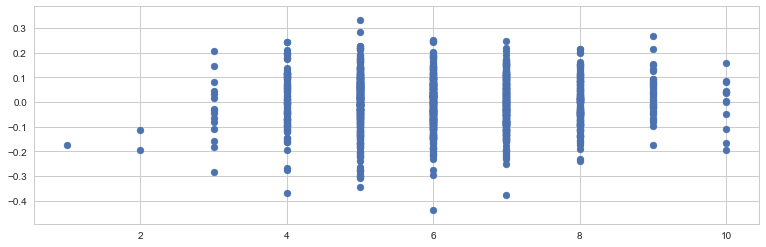

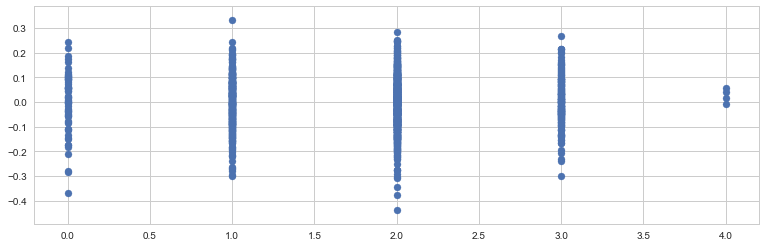

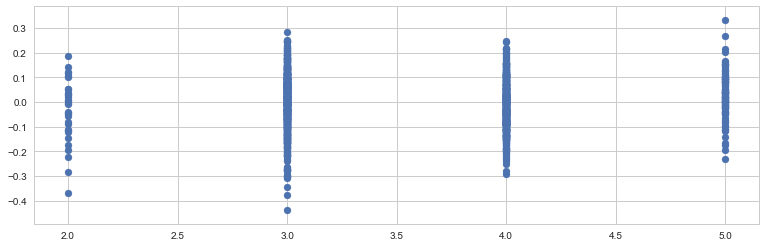

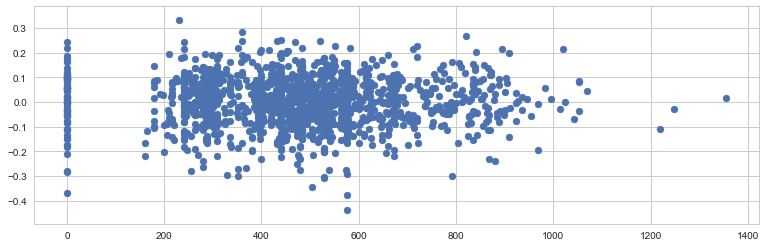

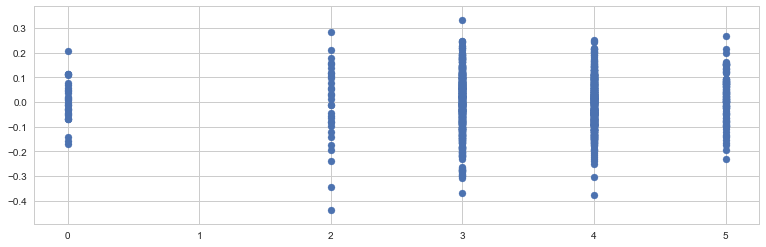

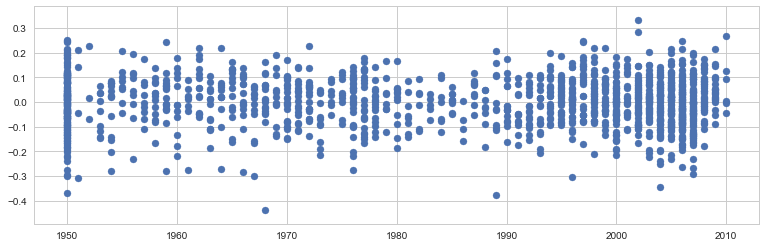

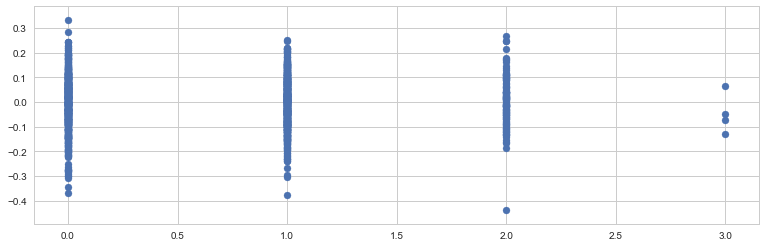

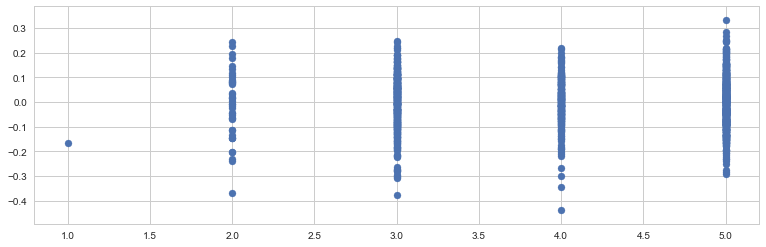

In [115]:
ls = ['OverallQual', 'GarageCars', 'KitchenQual', 'GarageArea', 'BsmtQual', 'YearRemodAdd', 'Fireplaces', 'HeatingQC']
for col in ls:
    plt.scatter(df_all2[col], result_all2.resid)
    plt.show()

In [112]:
df_all2['BsmtQual'].shape, result_all2.resid.shape

((1375,), (1375,))

In [106]:
sm.stats.anova_lm(result_all2, typ=2)

,sum_sq,df,F,PR(>F)
C(Neighborhood),2.599217,24.0,10.589000,2.236213e-36
C(Foundation),0.171562,5.0,3.354864,5.133974e-03
C(GarageType),0.543074,6.0,8.849767,1.757749e-09
C(BsmtExposure),0.688451,4.0,16.828172,1.844179e-13
C(SaleCondition),0.586240,5.0,11.463809,7.526120e-11
C(Exterior1st),0.284559,10.0,2.782254,2.080199e-03
C(MSZoning),0.813782,4.0,19.891704,6.505017e-16
scale(OverallQual),1.705374,1.0,166.741392,5.459268e-36
scale(TotSF),8.989046,1.0,878.895605,3.796172e-148
scale(GarageCars),0.047766,1.0,4.670267,3.087031e-02


In [ ]:
SalePrice ~ scale(HeatingQC) + scale(BsmtQual) 
+ scale(KitchenQual)+ C(Neighborhood)+ C(MSZoning) + 
scale(OverallQual) + scale(GarageCars) + scale(GrLivArea)
+ scale(OverallCond) + scale(YearBuilt)  + 
scale(BsmtFullBath)

In [109]:
pre = pd.DataFrame(result_all2.predict(df_test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))
pre.to_csv('submission.csv', index=False)